<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-и-предобработка" data-toc-modified-id="EDA-и-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA и предобработка</a></span><ul class="toc-item"><li><span><a href="#ticket_id" data-toc-modified-id="ticket_id-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ticket_id</a></span></li><li><span><a href="#ticket_type_nm" data-toc-modified-id="ticket_type_nm-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ticket_type_nm</a></span></li></ul></li></ul></div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузка и ознакомление с данными

In [1]:
# ячейка для загрузки библиотек, служебных команд и функций
import gc
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from tqdm import notebook
from tqdm import tqdm
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

In [2]:
#show all columns and rows in pamdas:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Считаем наши данные
pth1 = '/content/drive/MyDrive/quests/amur/train_dataset_train.csv' # серверный путь
pth2 = 'train_dataset_train.csv' # Локальный путь

pth3 = '/content/drive/MyDrive/quests/amur/test_dataset_test.csv' # серверный путь
pth4 = 'test_dataset_test.csv' # Локальный путь

if os.path.exists(pth1):
    df = pd.read_csv(pth1, index_col='id')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, index_col='id')
else:
    print('Something is wrong')  

if os.path.exists(pth3):
    df_test = pd.read_csv(pth3, index_col='id')
elif os.path.exists(pth4):
    df_test = pd.read_csv(pth4, index_col='id')
else:
    print('Something is wrong') 

In [6]:
df.sample(9)

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
id,,,,,,,,,,,
655566,59146C8D578528E555552D7141FA995F,Социальная карта москвича,60,Университет ( Северный ),1018,Университет,1,Сокольническая,2022-09-15 13:46:56,393.166667,1007
164637,A936AE1626C35A39E497CBE52F885B6B,Социальная карта москвича,2229,Верхние Лихоборы (Второй),10004,Верхние Лихоборы,10,Люблинско-Дмитровская,2022-09-12 18:19:08,89.033333,11002
183294,88710B1B0BBB18BFC85BF1114944B2ED,СК учащегося 90 дней,250,Рижская,6017,Рижская,6,Калужско-Рижская,2022-09-13 06:35:33,603.733333,2008
816504,A9C528C3EFA293DFEE1749A345AB4160,КОШЕЛЕК,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-16 13:35:54,446.616667,7014
126715,6D3F067CE5790D4539E5D56C0C00A843,30 дней ЕДИНЫЙ ТК,300,Рязанский проспект (Восточный),7016,Рязанский проспект,7,Таганско-Краснопресненская,2022-09-12 10:19:21,110.333333,7015
709306,DADAB9C1D832A0C20834112762996A31,30 дней ЕДИНЫЙ ТК,2242,Новопеределкино (Первый),81015,Новопеределкино,81,Солнцевская,2022-09-16 07:23:19,544.916667,10003
395782,D37C8E628681CBE0FEB6EBB4479E5167,Социальная карта москвича,127,Киевская Г/З ( Город ),3005,Киевская,3,Арбатско-Покровская,2022-09-14 07:56:47,572.483333,9003
108331,A7B37CE1B435980351930C7AD8C64C59,30 дней Пригород ТК,132,Арбатская Г/З,3001,Арбатская,3,Арбатско-Покровская,2022-09-12 09:19:37,592.050000,10013
195892,A27F64AB83A8CD6A8AE0A1DD3A87423C,90 дней,245,ВДНХ (Северный),6006,ВДНХ,6,Калужско-Рижская,2022-09-13 07:04:57,743.016667,11015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 1 to 1091021
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ticket_id       1091021 non-null  object 
 1   ticket_type_nm  1091021 non-null  object 
 2   entrance_id     1091021 non-null  int64  
 3   entrance_nm     1091021 non-null  object 
 4   station_id      1091021 non-null  int64  
 5   station_nm      1091021 non-null  object 
 6   line_id         1091021 non-null  int64  
 7   line_nm         1091021 non-null  object 
 8   pass_dttm       1091021 non-null  object 
 9   time_to_under   1091021 non-null  float64
 10  label           1091021 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 99.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561890 entries, 1091022 to 1652911
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ticket_id       561890 non-null  object
 1   ticket_type_nm  561890 non-null  object
 2   entrance_id     561890 non-null  int64 
 3   entrance_nm     561890 non-null  object
 4   station_id      561890 non-null  int64 
 5   station_nm      561890 non-null  object
 6   line_id         561890 non-null  int64 
 7   line_nm         561890 non-null  object
 8   pass_dttm       561890 non-null  object
dtypes: int64(3), object(6)
memory usage: 42.9+ MB


In [ ]:
df.duplicated().sum()

0

## EDA и предобработка

In [ ]:
X_full = df.copy()
X_test = df_test.copy()

In [ ]:
gc.collect()

853

### ticket_id

In [ ]:
X_full.ticket_id.nunique()

335533

In [ ]:
X_test.ticket_id.nunique()

172851

In [ ]:
def check(col, X_full=X_full, X_test=X_test):
    a = set(X_test[col].unique()) - set(X_full[col].unique())
    b = set(X_full[col].unique()) - set(X_test[col].unique())
    if len(a) == 0: print(f'В тестовых категориях признака {col} есть все категории обучающей базы')
    else: print(f'В тестовой выборке есть значения не встречающиеся в тренировочной их количество {len(a)}')
    return a

In [ ]:
check('ticket_id')

В тестовой выборке есть значения не встречающиеся в тренировочной их количество 172851


{'A2842C918BA4059B7750937C37547F18',
 'BE7C75E4D9C1528E1584E3072FBCF561',
 'C7F519840B34899F9833E09007E36053',
 '24228765DB1C0D0A8915114B61E3509A',
 '0AE87BF1C949C81E7E4E74DD02B3A262',
 'B64E2F6949CE65BF8C5F94D887018671',
 '063BCFCDD33F697571F1B114270B9A5B',
 'C76D2E2340ECDBEA885D65B0D682A2A4',
 '0D98381BB2457EC6789F66D5BD82350D',
 'B5BBD27D00969FDEDD1DB6D3E59BF254',
 '500A6CBFE6C0C1B09AD616CE6ECD2AA5',
 '04E8A673F2A7CB528F986D19BA49B689',
 '784423861410F70D1A08EDED89DDD319',
 '85F4680DBBBFD4C46BE6E8C193D9A198',
 'D15B42A42A4B4A696821C848A6129EC7',
 'A057F0BCCCCE6E2B79E4C8EEE43107CC',
 '44E8446E7B2DAC460C390DE6BC105EA0',
 'ED32FA032F1E65F0F8E04A26490F4B4F',
 'B5369E2B008D50EBFBCFC8E4BE0BB1F1',
 '9579FC29A3BA4486E08AD34D67B6F55A',
 '4799311D95E5AD48EEC254622AD45E7F',
 '235E8685A40EF79696839E988CB98776',
 'A373C4A2BF6C8FCC41FB0E6CCCC02539',
 '81FE1EC7D1A0486F1EB20C58570BE7D6',
 '8907D7F4B325D97BF6236272E8125DE5',
 'A4E773B47D7DF18D49D9DE1B297D594D',
 '6B70A1282063B6378E2ABDAF3A3EE906',
 

В выборках тест и трейн нету пресеающихся билетов!

In [ ]:
X_full.ticket_id.value_counts().mean()

3.2516056542873577

In [ ]:
X_test.ticket_id.value_counts().mean()

3.2507188271979914

В среднем каждый билет в базе ездил 3.25 раза

In [ ]:
X_full['ticket_id'] = X_full.ticket_id.astype('category')
X_test['ticket_id'] = X_test.ticket_id.astype('category')

In [ ]:
def info(X_full=X_full, X_test=X_test):
    display(X_full.info())
    display(X_test.info())

In [ ]:
info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 1 to 1091021
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   ticket_id       1091021 non-null  category
 1   ticket_type_nm  1091021 non-null  object  
 2   entrance_id     1091021 non-null  int64   
 3   entrance_nm     1091021 non-null  object  
 4   station_id      1091021 non-null  int64   
 5   station_nm      1091021 non-null  object  
 6   line_id         1091021 non-null  int64   
 7   line_nm         1091021 non-null  object  
 8   pass_dttm       1091021 non-null  object  
 9   time_to_under   1091021 non-null  float64 
 10  label           1091021 non-null  int64   
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 106.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561890 entries, 1091022 to 1652911
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   ticket_id       561890 non-null  category
 1   ticket_type_nm  561890 non-null  object  
 2   entrance_id     561890 non-null  int64   
 3   entrance_nm     561890 non-null  object  
 4   station_id      561890 non-null  int64   
 5   station_nm      561890 non-null  object  
 6   line_id         561890 non-null  int64   
 7   line_nm         561890 non-null  object  
 8   pass_dttm       561890 non-null  object  
dtypes: category(1), int64(3), object(5)
memory usage: 46.1+ MB


None

### ticket_type_nm

In [ ]:
check('ticket_type_nm')

В тестовой выборке есть значения не встречающиеся в тренировочной их количество 1


{'СК студента на 3 месяца'}

In [ ]:
X_full.ticket_type_nm.nunique()

60

In [ ]:
X_test.ticket_type_nm.nunique()

58

In [ ]:
X_full.ticket_type_nm.value_counts()

КОШЕЛЕК                                                   262499
30 дней ЕДИНЫЙ ТК                                         177041
Социальная карта москвича                                 127022
30 дней                                                   117064
90 дней ЕДИНЫЙ ТК                                          58071
30 дней СК студента                                        48658
60 поездок ЕДИНЫЙ ТК                                       46542
30 дней Пригород ТК                                        45381
СК студента 30 дней                                        39395
ББК                                                        29674
30 дней СК учащегося                                       24307
365 дней ЕДИНЫЙ ТК                                         20859
СК учащегося 30 дней                                       16933
Социальная карта жителя Моск. области                      15551
90 дней                                                    12817
Пропуск FacePay          

In [ ]:
dict = {
    'wallet': ['КОШЕЛЕК'],
    'simple_30': ['30 дней ЕДИНЫЙ ТК', '30 дней'],
    'social_moscow': ['Социальная карта москвича'],
    'simple_90': ['90 дней ЕДИНЫЙ ТК', '90 дней'],
    'student_30': ['30 дней СК студента', 'СК студента 30 дней'],
    'simple_60': ['60 поездок ЕДИНЫЙ ТК'],
    'prigorod_30': ['30 дней Пригород ТК', '30 дней  Пригород'],
    'bank_card': ['ББК', 'Безналичная транспортная карта'],
    'school_30': ['30 дней СК учащегося', 'СК учащегося 30 дней'],
    'simple_365': ['365 дней ЕДИНЫЙ ТК', '365 дней'],
    'metro_uvd': ['Пропуск сотрудника УВД по охране Метрополитена'],
    'police': ['СК для сотрудника ГУВД г.Москвы'],
    'socialmo': ['Социальная карта жителя Моск. области'],
    'facepay': ['Пропуск FacePay'],
    'student_90': ['СК студента на 3 месяца', 'СК студента 90 дней', '90 дней СК студента'],
    'school_90': ['СК учащегося 90 дней', '90 дней СК учащегося '],
    'druzhina': ['БСК дружинника г.Москвы'],
    'social_temp_moscow': ['ВЕСБ МОСКВА (7мин)', 'ВЕСБ МОСКВА', 'ВЛБ МОСКВА'],
    'social_escort_moscow': ['Социальная карта москвича с сопровождающим'],
    'prigorod_90': ['90 дней Пригород ТК', '90 дней  Пригород'],
    'student_medic_30': ['30 дней СК ординатора', 'СК ординатора 30 дней'],
    'prigorod_365': ['365 дней Пригород ТК', '365 дней  Пригород'],
    'aspirant_30': ['30 дней СК аспиранта', 'СК аспиранта 30 дней'],
    'aspirant_90': ['СК аспиранта 90 дней', '90 дней СК аспиранта'],
    'short_3': ['3 суток Единый ТК', 'Билет 3 суток ЕДИНЫЙ'],
    'student_medic_90': ['СК ординатора 90 дней', '90 дней СК ординатора'],
    'socialmo_temp': ['ВЕСБ МО (7 мин)', 'ВЕСБ МО (тип 5)', 'ВЕСБ МО с сопровождающим', 'ВЕСБ МО (тип 6)'],
    'socialmo_escort': ['Социальная карта жителя Моск. области с сопровождающим'],
    'simple_70': ['Ультралайт Единый (70)'],
    'temp_ticket': ['Временный билет ММ'],
    'short_1': ['1 сутки ЕДИНЫЙ ТК', 'Билет 1 сутки ЕДИНЫЙ'],
    'metro_workers': ['Пропуск сотрудника  метрополитена'],
    'student_stazher_30': ['30 дней СК ассистента-стажера', 'СК ассистента-стажера 30 дней'],
    'metro_mck_worker': ['Пропуск  сотрудника МЦК'],
    'metro_boss': ['Пропуск руководителя метрополитена'],
    'student_stazher_90': ['СК ассистента-стажера 90 дней'],
    'short_prig1': ['1 сутки Пригород ТК']    
}

In [ ]:
len(dict)

37

In [ ]:
def my_lemma(ticket_type_nm, dict=dict):   
    """
    Категоризация стеммингом видов.
    Если в названии билета, функция видит значения из своего словаря, то возвращает категорию являющуюся ключом словаря.
    """
    try:
        for key, values in dict.items():
            for value in values:
                if  ticket_type_nm in value:
                    return key
        raise Exception('!')  #сюда дойдем только если ничего не найдём и вызовем исключение      
    except:
        print(ticket_type_nm)
        return 'Название некорректное или не найден в словаре целей кредита'  

In [ ]:
my_lemma('Ультралайт Единый (70)')

'simple_70'

In [ ]:
my_lemma('365 дней')

'simple_365'

In [ ]:
tqdm.pandas()
X_full['ticket_type_nm'] = X_full.ticket_type_nm.progress_apply(my_lemma)

100%|██████████| 1091021/1091021 [00:02<00:00, 495600.88it/s]


In [ ]:
tqdm.pandas()
X_test['ticket_type_nm'] = X_test.ticket_type_nm.progress_apply(my_lemma)

100%|██████████| 561890/561890 [00:01<00:00, 388556.26it/s]


In [ ]:
X_full.ticket_type_nm.value_counts(normalize=True)

simple_30               0.269569
wallet                  0.240599
social_moscow           0.116425
student_30              0.080707
simple_90               0.064974
prigorod_30             0.044435
simple_60               0.042659
school_30               0.037799
bank_card               0.027253
simple_365              0.019823
socialmo                0.014254
student_90              0.008505
facepay                 0.008464
school_90               0.004324
druzhina                0.002593
police                  0.002414
social_temp_moscow      0.002399
prigorod_90             0.002242
student_medic_30        0.002227
social_escort_moscow    0.002082
aspirant_30             0.001754
prigorod_365            0.001103
short_3                 0.000566
aspirant_90             0.000552
metro_uvd               0.000496
student_medic_90        0.000461
socialmo_temp           0.000367
socialmo_escort         0.000224
simple_70               0.000214
temp_ticket             0.000146
short_1   

In [ ]:
X_test.ticket_type_nm.value_counts(normalize=True)

simple_30               0.270131
wallet                  0.239880
social_moscow           0.116227
student_30              0.080647
simple_90               0.064883
prigorod_30             0.043638
simple_60               0.042407
school_30               0.038427
bank_card               0.027060
simple_365              0.020566
socialmo                0.014024
student_90              0.008537
facepay                 0.008534
school_90               0.004421
druzhina                0.002808
prigorod_90             0.002543
police                  0.002509
social_temp_moscow      0.002246
student_medic_30        0.002136
social_escort_moscow    0.002011
aspirant_30             0.001719
prigorod_365            0.001281
aspirant_90             0.000598
short_3                 0.000482
metro_uvd               0.000481
socialmo_temp           0.000411
student_medic_90        0.000397
socialmo_escort         0.000219
simple_70               0.000185
temp_ticket             0.000169
short_1   

In [ ]:
display(X_full.ticket_type_nm.nunique())
X_test.ticket_type_nm.nunique()

37

37

In [ ]:
dict_cat = {
   'simple': ['simple', 'wallet', 'bank_card', 'facepay'],
   'social_oblast': ['socialmo'],
   'social_moscow': ['social_'],
   'students': ['student'],
   'prigorod': ['prigorod'],
   'schoolars': ['school'],
   'other': ['druzhina', 'temp_ticket'],
   'police': ['police'],
   'aspirants': ['aspirant'],
   'metro_workers': ['metro_'],
   'short': ['short']
}

In [ ]:
def my_categorization(ticket_type_nm, dict=dict_cat):   
    """
    Категоризация стеммингом видов.
    Если в названии билета, функция видит значения из своего словаря, то возвращает категорию являющуюся ключом словаря.
    """
    try:
        for key, values in dict_cat.items():
            for value in values:
                if  value in ticket_type_nm:
                    return key
        raise Exception('!')  #сюда дойдем только если ничего не найдём и вызовем исключение      
    except:
        print(ticket_type_nm)
        return 'Название некорректное или не найден в словаре целей кредита' 

In [ ]:
tqdm.pandas()
X_full['passenger_category'] = X_full.ticket_type_nm.progress_apply(my_categorization)

100%|██████████| 1091021/1091021 [00:03<00:00, 313003.81it/s]


In [ ]:
tqdm.pandas()
X_test['passenger_category'] = X_test.ticket_type_nm.progress_apply(my_categorization)

100%|██████████| 561890/561890 [00:01<00:00, 517984.09it/s]


In [ ]:
X_full[['ticket_type_nm', 'passenger_category']].sample(15)

,ticket_type_nm,passenger_category
id,,
616909,simple_30,simple
689176,wallet,simple
777291,wallet,simple
650666,social_moscow,social_moscow
654383,socialmo,social_oblast
497113,student_30,students
505669,simple_30,simple
1087342,wallet,simple
723502,bank_card,simple


In [ ]:
X_full.passenger_category.value_counts()

simple           734862
social_moscow    131911
students         100358
prigorod          52128
schoolars         45958
social_oblast     16195
other              2988
police             2634
aspirants          2516
short               749
metro_workers       722
Name: passenger_category, dtype: int64

In [ ]:
X_test.passenger_category.value_counts()

simple           378515
social_moscow     67699
students          51580
prigorod          26669
schoolars         24076
social_oblast      8234
other              1673
police             1410
aspirants          1302
metro_workers       380
short               352
Name: passenger_category, dtype: int64

### Станция отправления

In [ ]:
station_dict = X_full[['station_id','station_nm']]
station_dict = station_dict.drop_duplicates().sort_values(by='station_id').reset_index(drop=True)

In [ ]:
station_dict 

,station_id,station_nm
0,1002,Бульвар Рокоссовского
1,1003,Воробьёвы горы
2,1004,Комсомольская
3,1005,Красносельская
4,1006,Красные Ворота
5,1007,Кропоткинская
6,1008,Лубянка
7,1009,Охотный ряд
8,1011,Преображенская площадь
9,1012,Проспект Вернадского


In [ ]:
X_full.drop(['entrance_id',	'entrance_nm', 'station_nm',	'line_id',	'line_nm'], axis=1, inplace=True)
X_test.drop(['entrance_id',	'entrance_nm', 'station_nm',	'line_id',	'line_nm'], axis=1, inplace=True)

In [ ]:
info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 1 to 1091021
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   ticket_id           1091021 non-null  category
 1   ticket_type_nm      1091021 non-null  object  
 2   station_id          1091021 non-null  int64   
 3   pass_dttm           1091021 non-null  object  
 4   time_to_under       1091021 non-null  float64 
 5   label               1091021 non-null  int64   
 6   passenger_category  1091021 non-null  object  
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 73.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561890 entries, 1091022 to 1652911
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   ticket_id           561890 non-null  category
 1   ticket_type_nm      561890 non-null  object  
 2   station_id          561890 non-null  int64   
 3   pass_dttm           561890 non-null  object  
 4   passenger_category  561890 non-null  object  
dtypes: category(1), int64(1), object(3)
memory usage: 28.9+ MB


None

In [ ]:
X_full.head(5)

,ticket_id,ticket_type_nm,station_id,pass_dttm,time_to_under,label,passenger_category
id,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,facepay,11007,2022-09-12 05:00:13,216.316667,8001,simple
2,126727A96489CC976A8C08E5CEB00542,school_30,2006,2022-09-12 05:00:54,648.183333,9011,schoolars
3,D28CE6A9E0E5B6D213470A97CFF32485,druzhina,2006,2022-09-12 05:00:55,865.333333,7022,other
4,015DA44B523C062B5BFEFF3FB0E64B9E,simple_30,2006,2022-09-12 05:01:13,1048.233333,2022,simple
5,95B19C6F3A504727AC3EA56EB7E3E80F,wallet,2006,2022-09-12 05:02:55,965.600000,2017,simple


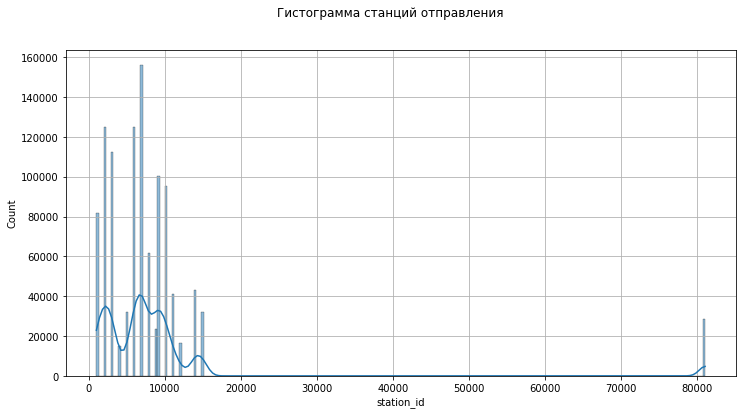

In [ ]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=X_full.station_id, kde=True, bins=250)
plt.suptitle(f"Гистограмма станций отправления")
plt.grid(True)
plt.show()

### pass_dtm

In [ ]:
display(X_full.pass_dttm.min())
X_full.pass_dttm.max()

'2022-09-12 05:00:13'

'2022-09-19 04:10:42'

In [ ]:
display(X_test.pass_dttm.min())
X_test.pass_dttm.max()

'2022-09-12 05:00:03'

'2022-09-19 03:13:27'

Все поездки в течение одной недели

Добавим новый признак: день недели поездки

In [ ]:
X_full['pass_dttm'] = pd.to_datetime(X_full.pass_dttm, format='%Y-%m-%dT%H:%M:%S')
X_test['pass_dttm'] = pd.to_datetime(X_test.pass_dttm, format='%Y-%m-%dT%H:%M:%S')

In [ ]:
X_full['day_valid'] = X_full['pass_dttm'].dt.dayofweek
X_test['day_valid'] = X_test['pass_dttm'].dt.dayofweek

Новый признак сколько секунд прошло с начала дня до момента валидации

In [ ]:
X_full['time_valid'] = pd.to_timedelta(X_full['pass_dttm'].dt.time.astype(str)).dt.total_seconds().astype('int')
X_test['time_valid'] = pd.to_timedelta(X_test['pass_dttm'].dt.time.astype(str)).dt.total_seconds().astype('int')

In [ ]:
# X_full.drop(['pass_dttm'], axis=1, inplace=True)
# X_test.drop(['pass_dttm'], axis=1, inplace=True)

In [ ]:
info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 1 to 1091021
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ticket_id           1091021 non-null  category      
 1   ticket_type_nm      1091021 non-null  object        
 2   station_id          1091021 non-null  int64         
 3   pass_dttm           1091021 non-null  datetime64[ns]
 4   time_to_under       1091021 non-null  float64       
 5   label               1091021 non-null  int64         
 6   passenger_category  1091021 non-null  object        
 7   day_valid           1091021 non-null  int64         
 8   time_valid          1091021 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 89.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561890 entries, 1091022 to 1652911
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ticket_id           561890 non-null  category      
 1   ticket_type_nm      561890 non-null  object        
 2   station_id          561890 non-null  int64         
 3   pass_dttm           561890 non-null  datetime64[ns]
 4   passenger_category  561890 non-null  object        
 5   day_valid           561890 non-null  int64         
 6   time_valid          561890 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 37.5+ MB


None

In [ ]:
X_full.sample(11)

,ticket_id,ticket_type_nm,station_id,pass_dttm,time_to_under,label,passenger_category,day_valid,time_valid
id,,,,,,,,,
691654,567846379014F1EF4905DD2A1496DB29,simple_90,7004,2022-09-16 06:46:19,570.733333,7011,simple,4,24379
929273,762EB757179F8787149C3A2278399F1C,simple_60,9021,2022-09-17 12:27:09,207.883333,6020,simple,5,44829
594872,F46AF52B37FDCA5E5A64EFA36BF3A17B,simple_90,7009,2022-09-15 08:39:00,609.300000,5007,simple,3,31140
465966,FF0C3F6636635642DE177E8BD2DE4A1B,simple_90,8005,2022-09-14 10:19:54,441.233333,6013,simple,2,37194
355429,A65BF9AFA7CB3EFC8511BB6BB975E9B8,simple_30,2009,2022-09-14 06:43:30,684.150000,6003,simple,2,24210
357809,06D18005204A0B717EDB0DB27F8BC869,wallet,10009,2022-09-14 06:49:34,746.583333,7009,simple,2,24574
950012,243872B48B654ADCAEE11ECFB037DD0F,wallet,12005,2022-09-17 15:22:59,304.950000,6022,simple,5,55379
941424,8B04986D0147AD1B6C500DBEEFE38EFE,social_escort_moscow,8001,2022-09-17 14:04:09,72.866667,2004,social_moscow,5,50649
885534,AEA1C09BF4093E8FFCA1FB270C05A7C0,social_moscow,5001,2022-09-17 08:43:08,521.700000,3008,social_moscow,5,31388


In [ ]:
X_test.sample(11)

,ticket_id,ticket_type_nm,station_id,pass_dttm,passenger_category,day_valid,time_valid
id,,,,,,,
1219629,3737B28B0A56875FDD85A4A60B4AA6CD,simple_90,1011,2022-09-13 08:24:57,simple,1,30297
1396275,502005BB4ACBAD8C3C635F14BB0C3F04,prigorod_30,2003,2022-09-15 08:35:30,prigorod,3,30930
1129186,4DD32680191DAFC489A8AE7051DB26FF,simple_30,10023,2022-09-12 08:19:22,simple,0,29962
1130184,6CB1C5F9E9C926BF0294218A08B3D7BC,socialmo_escort,15003,2022-09-12 08:21:52,social_oblast,0,30112
1511514,FC1DAC330AA05FD013BFFE01DCBB3242,student_30,3018,2022-09-16 13:40:53,students,4,49253
1262241,34667DB08A846B428F2C4013ABBEE3B6,social_moscow,2012,2022-09-13 17:34:15,social_moscow,1,63255
1142146,B3F7F610336E41C45542F7A5A870882B,student_30,1004,2022-09-12 09:00:00,students,0,32400
1209771,32361FB20A8688E59B4305AEB4EB913E,wallet,6009,2022-09-13 08:01:35,simple,1,28895
1117264,14F9128FF4DCF8BA2252835B711DC4A8,wallet,9001,2022-09-12 07:49:10,simple,0,28150


Нагенерим еще признаков, количество поездок, среднее, стандартное отклонение, дисперсия, уникальное количество станций

In [ ]:
group_tickets_full = X_full.sort_values(by='pass_dttm').pivot_table(index='ticket_id', values=['station_id', 'day_valid', 'time_valid'], aggfunc=['count', 'mean', 'std', 'var', 'nunique'])

In [ ]:
group_tickets_test = X_test.sort_values(by='pass_dttm').pivot_table(index='ticket_id', values=['station_id', 'day_valid', 'time_valid'], aggfunc=['count', 'mean', 'std', 'var', 'nunique'])

In [ ]:
group_tickets_full.sample(5)

count                            mean  \
                                 day_valid station_id time_valid day_valid   
ticket_id                                                                    
46DAA4B138F704572B4801B9054DBD3E         2          2          2  4.000000   
BF8C4C2E45BBFBE0413ED5CF0364A80F         1          1          1  3.000000   
14BEF6518525C87E26BBA40C9BE18EE6         3          3          3  1.666667   
F81B34CABA1A17F754BF75FDBA3BE30D         2          2          2  2.500000   
3672A2D353DA3FBE918E72F6113D6355         1          1          1  1.000000   

                                                             std               \
                                 station_id time_valid day_valid   station_id   
ticket_id                                                                       
46DAA4B138F704572B4801B9054DBD3E     8507.0    46189.0  1.414214  2118.491916   
BF8C4C2E45BBFBE0413ED5CF0364A80F     7011.0    31307.0       NaN          NaN   
14BEF6518525C87E26BBA40C9BE18EE6     8003.0    62918.0  2.081666     0.000000   
F81B34CABA1A17F754BF75FDBA3BE30D     6004.0    48457.5  2.121320     0.000000   
3672A2D353DA3FBE918E72F6113D6355    10022.0    29983.0       NaN          NaN   

                                                     var             \
                                    time_valid day_valid station_id   
ticket_id                                                             
46DAA4B138F704572B4801B9054DBD3E  20210.526020  2.000000  4488008.0   
BF8C4C2E45BBFBE0413ED5CF0364A80F           NaN       NaN        NaN   
14BEF6518525C87E26BBA40C9BE18EE6   8774.657144  4.333333        0.0   
F81B34CABA1A17F754BF75FDBA3BE30D  20823.587599  4.500000        0.0   
3672A2D353DA3FBE918E72F6113D6355           NaN       NaN        NaN   

                                                nunique                        
                                   time_valid day_valid station_id time_valid  
ticket_id                                                                      
46DAA4B138F704572B4801B9054DBD3E  408465362.0         2          2          2  
BF8C4C2E45BBFBE0413ED5CF0364A80F          NaN         1          1          1  
14BEF6518525C87E26BBA40C9BE18EE6   76994608.0         3          1          3  
F81B34CABA1A17F754BF75FDBA3BE30D  433621800.5         2          1          2  
3672A2D353DA3FBE918E72F6113D6355          NaN         1          1          1

Удалим избуточные признаки

In [ ]:
group_tickets_full = group_tickets_full.drop(group_tickets_full.columns[[1, 2, 3, 4, 7, 10, 12, 14]], axis=1)

In [ ]:
group_tickets_test = group_tickets_test.drop(group_tickets_test.columns[[1, 2, 3, 4, 7, 10, 12, 14]], axis=1)

Избавимся от мульдиндекса в названии колонок

In [ ]:
group_tickets_full.columns = ['count_of_trips', 'mean_time_valid', 'std_day_valid', 'std_time_valid', 'var_day_valid', 'var_time_valid', 'n_station_id']

In [ ]:
group_tickets_test.columns = ['count_of_trips', 'mean_time_valid', 'std_day_valid', 'std_time_valid', 'var_day_valid', 'var_time_valid', 'n_station_id']

In [ ]:
group_tickets_full.sample(5)

,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
ticket_id,,,,,,,
75D5476A20252618BC82344A74BEBAC7,4,21860.250000,1.290994,540.024922,1.666667,2.916269e+05,1
35E34E87A2317932A2D86366E34D9F3B,6,33629.833333,2.316607,841.713827,5.366667,7.084822e+05,1
203DDE05DD498AA16CF055EDBFC32C22,6,25302.500000,2.160247,927.148478,4.666667,8.596043e+05,1
E81C56BA24C9200E5939D03EA205FC42,2,33900.000000,2.828427,4088.491409,8.000000,1.671576e+07,1
4DCEB8221433764D940B8572890491B2,3,34599.333333,1.527525,1035.659371,2.333333,1.072590e+06,1


In [ ]:
group_tickets_test.sample(15)

,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
ticket_id,,,,,,,
95164E0C3721BA7864BE67EAC5BB70A0,1,48426.000000,NaN,NaN,NaN,NaN,1
2F7E86AB0B52A30F7A481A895FB5F6D5,3,52597.666667,3.055050,14049.096211,9.333333,1.973771e+08,2
1B2F1E5301E5A9F6A1BA20E23B0918B7,4,32085.750000,1.707825,5589.606985,2.916667,3.124371e+07,1
B44E289642E4BF5E4D2F9529C43D8B12,4,49064.000000,2.160247,13501.280853,4.666667,1.822846e+08,1
4EB06E0B1497B5CF27131AA557C4A6D0,2,35524.000000,1.414214,4737.615434,2.000000,2.244500e+07,1
E0AB7447034C480C4D6B22868B789E3B,7,27629.857143,2.160247,329.710190,4.666667,1.087088e+05,1
29ABB72DE7714EC32556312C8B3F34FF,1,24288.000000,NaN,NaN,NaN,NaN,1
0D6D7FFE16E76F54F2D724B9A105D6EE,1,53276.000000,NaN,NaN,NaN,NaN,1
BD8701EFA62726B351AEF84AB7223F94,7,48434.714286,2.160247,5105.199921,4.666667,2.606307e+07,2


Заменим образовавшиеся пропуски на маркеры:

In [ ]:
group_tickets_full.fillna(-1, inplace=True)
group_tickets_test.fillna(-1, inplace=True)

Объединим наши пивоты с основными выборками

In [ ]:
X = X_full.join(group_tickets_full, on='ticket_id')

In [ ]:
X_test_last = X_test.join(group_tickets_test, on='ticket_id')

In [ ]:
X.sample(6)

,ticket_id,ticket_type_nm,station_id,pass_dttm,time_to_under,label,passenger_category,day_valid,time_valid,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
id,,,,,,,,,,,,,,,,
610308,841902A652F28ECAC45627CB1AB1630C,simple_30,9012,2022-09-15 09:11:23,595.716667,5012,simple,3,33083,3,33563.333333,1.000000,881.785877,1.000000,7.775463e+05,2
717326,573E4A095265E5BB51D93C7ED653D216,simple_60,2017,2022-09-16 07:38:07,548.533333,3017,simple,4,27487,5,27547.800000,1.581139,149.032547,2.500000,2.221070e+04,2
922469,8EC1AF5053A3A24089E46D7C01E4DE7D,wallet,10011,2022-09-17 11:37:32,162.016667,10012,simple,5,41852,4,33167.500000,2.160247,5803.431255,4.666667,3.367981e+07,1
439545,C04C1ED59AEF325F2A3DE990181B5079,simple_60,15002,2022-09-14 09:02:08,591.750000,7001,simple,2,32528,2,29889.500000,2.121320,3731.402484,4.500000,1.392336e+07,1
956255,E339D974025611B9262168C3FC275A44,bank_card,1005,2022-09-17 16:26:52,316.916667,2011,simple,5,59212,4,53642.750000,2.160247,13509.555220,4.666667,1.825081e+08,3
439224,249C6B318ED13BCAE8B0A92A71D53AE5,social_moscow,2008,2022-09-14 09:01:31,344.400000,2023,social_moscow,2,32491,7,35896.714286,2.160247,3403.482859,4.666667,1.158370e+07,2


In [ ]:
X_test_last.head()

,ticket_id,ticket_type_nm,station_id,pass_dttm,passenger_category,day_valid,time_valid,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
id,,,,,,,,,,,,,,
1091022,425A13E16226CA01032043111488E0F5,wallet,2006,2022-09-12 05:00:03,simple,0,18003,4,29203.750000,1.825742,8605.954697,3.333333,7.406246e+07,1
1091023,F94EDC107A4E054786882F9453C1B93F,facepay,3010,2022-09-12 05:00:45,simple,0,18045,3,33967.000000,1.527525,23012.525698,2.333333,5.295763e+08,2
1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,student_30,2006,2022-09-12 05:00:52,students,0,18052,6,39320.166667,2.160247,14828.942018,4.666667,2.198975e+08,1
1091025,7B98691636EC418ABF6FEDDE4D7C68FC,wallet,2018,2022-09-12 05:00:58,simple,0,18058,3,36184.333333,2.516611,22732.768778,6.333333,5.167788e+08,2
1091026,679C55C28CB36FB546FD104502C0B3DB,wallet,2006,2022-09-12 05:01:39,simple,0,18099,2,29273.000000,0.707107,15802.422346,0.500000,2.497166e+08,1


In [ ]:
X.query('ticket_id == "FC6B8D94F60F7A9054A3D870AB24173D"')

,ticket_id,ticket_type_nm,station_id,pass_dttm,time_to_under,label,passenger_category,day_valid,time_valid,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
id,,,,,,,,,,,,,,,,
72773,FC6B8D94F60F7A9054A3D870AB24173D,wallet,7020,2022-09-12 08:17:48,627.466667,7016,simple,0,29868,5,30385.2,2.408319,598.800217,5.8,358561.7,1
414800,FC6B8D94F60F7A9054A3D870AB24173D,wallet,7020,2022-09-14 08:20:51,807.750000,7016,simple,2,30051,5,30385.2,2.408319,598.800217,5.8,358561.7,1
748017,FC6B8D94F60F7A9054A3D870AB24173D,wallet,7020,2022-09-16 08:22:33,600.750000,7016,simple,4,30153,5,30385.2,2.408319,598.800217,5.8,358561.7,1
885505,FC6B8D94F60F7A9054A3D870AB24173D,wallet,7020,2022-09-17 08:43:02,566.750000,7016,simple,5,31382,5,30385.2,2.408319,598.800217,5.8,358561.7,1
1003536,FC6B8D94F60F7A9054A3D870AB24173D,wallet,7020,2022-09-18 08:27:52,579.433333,7016,simple,6,30472,5,30385.2,2.408319,598.800217,5.8,358561.7,1


In [ ]:
test = X.query('ticket_id=="0000680906DD9A73E4643DE01195B9FF"')

In [ ]:
test

,ticket_id,ticket_type_nm,station_id,pass_dttm,time_to_under,label,passenger_category,day_valid,time_valid,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
id,,,,,,,,,,,,,,,,
101926,0000680906DD9A73E4643DE01195B9FF,wallet,3011,2022-09-12 09:05:42,782.950000,1022,simple,0,32742,7,34521.714286,2.160247,4236.814358,4.666667,1.795060e+07,2
273135,0000680906DD9A73E4643DE01195B9FF,wallet,3011,2022-09-13 09:05:53,772.133333,1022,simple,1,32753,7,34521.714286,2.160247,4236.814358,4.666667,1.795060e+07,2
447009,0000680906DD9A73E4643DE01195B9FF,wallet,3011,2022-09-14 09:18:25,758.933333,1022,simple,2,33505,7,34521.714286,2.160247,4236.814358,4.666667,1.795060e+07,2
610157,0000680906DD9A73E4643DE01195B9FF,wallet,3011,2022-09-15 09:11:02,766.250000,1022,simple,3,33062,7,34521.714286,2.160247,4236.814358,4.666667,1.795060e+07,2
809861,0000680906DD9A73E4643DE01195B9FF,wallet,3003,2022-09-16 12:15:08,590.366667,1022,simple,4,44108,7,34521.714286,2.160247,4236.814358,4.666667,1.795060e+07,2
891518,0000680906DD9A73E4643DE01195B9FF,wallet,3011,2022-09-17 09:04:53,771.250000,1022,simple,5,32693,7,34521.714286,2.160247,4236.814358,4.666667,1.795060e+07,2
1012361,0000680906DD9A73E4643DE01195B9FF,wallet,3003,2022-09-18 09:06:29,775.833333,1022,simple,6,32789,7,34521.714286,2.160247,4236.814358,4.666667,1.795060e+07,2


Дропаем время валидации, оно теперь нам ни к чему: есть секунды и дни недели

In [ ]:
X = X.drop('pass_dttm', axis=1)
X_test_last =  X_test_last.drop('pass_dttm', axis=1)

In [ ]:
X.head()

,ticket_id,ticket_type_nm,station_id,time_to_under,label,passenger_category,day_valid,time_valid,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
id,,,,,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,facepay,11007,216.316667,8001,simple,0,18013,1,18013.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,1
2,126727A96489CC976A8C08E5CEB00542,school_30,2006,648.183333,9011,schoolars,0,18054,5,36682.600000,2.549510,15008.832943,6.500000,2.252651e+08,1
3,D28CE6A9E0E5B6D213470A97CFF32485,druzhina,2006,865.333333,7022,other,0,18055,5,36198.800000,2.236068,13871.974668,5.000000,1.924317e+08,1
4,015DA44B523C062B5BFEFF3FB0E64B9E,simple_30,2006,1048.233333,2022,simple,0,18073,6,38681.333333,2.316607,10313.346667,5.366667,1.063651e+08,2
5,95B19C6F3A504727AC3EA56EB7E3E80F,wallet,2006,965.600000,2017,simple,0,18175,4,36340.000000,2.629956,13741.081423,6.916667,1.888173e+08,1


In [ ]:
X_test_last.head()

,ticket_id,ticket_type_nm,station_id,passenger_category,day_valid,time_valid,count_of_trips,mean_time_valid,std_day_valid,std_time_valid,var_day_valid,var_time_valid,n_station_id
id,,,,,,,,,,,,,
1091022,425A13E16226CA01032043111488E0F5,wallet,2006,simple,0,18003,4,29203.750000,1.825742,8605.954697,3.333333,7.406246e+07,1
1091023,F94EDC107A4E054786882F9453C1B93F,facepay,3010,simple,0,18045,3,33967.000000,1.527525,23012.525698,2.333333,5.295763e+08,2
1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,student_30,2006,students,0,18052,6,39320.166667,2.160247,14828.942018,4.666667,2.198975e+08,1
1091025,7B98691636EC418ABF6FEDDE4D7C68FC,wallet,2018,simple,0,18058,3,36184.333333,2.516611,22732.768778,6.333333,5.167788e+08,2
1091026,679C55C28CB36FB546FD104502C0B3DB,wallet,2006,simple,0,18099,2,29273.000000,0.707107,15802.422346,0.500000,2.497166e+08,1


Сохраняем в ксв, для работы с моделями

In [ ]:
X.to_csv('/content/drive/MyDrive/quests/amur/X_full.csv', index=True, sep=",", line_terminator='\n')

In [ ]:
X_test_last.to_csv('/content/drive/MyDrive/quests/amur/X_test.csv', sep=",", line_terminator='\n')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 1 to 1091021
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   ticket_id           1091021 non-null  category
 1   ticket_type_nm      1091021 non-null  object  
 2   station_id          1091021 non-null  int64   
 3   time_to_under       1091021 non-null  float64 
 4   label               1091021 non-null  int64   
 5   passenger_category  1091021 non-null  object  
 6   day_valid           1091021 non-null  int64   
 7   time_valid          1091021 non-null  int64   
 8   count_of_trips      1091021 non-null  int64   
 9   mean_time_valid     1091021 non-null  float64 
 10  std_day_valid       1091021 non-null  float64 
 11  std_time_valid      1091021 non-null  float64 
 12  var_day_valid       1091021 non-null  float64 
 13  var_time_valid      1091021 non-null  float64 
 14  n_station_id        1091021 non-null  int64   
dty

In [ ]:
X.columns

Index(['ticket_id', 'ticket_type_nm', 'station_id', 'time_to_under', 'label',
       'passenger_category', 'day_valid', 'time_valid', 'count_of_trips',
       'mean_time_valid', 'std_day_valid', 'std_time_valid', 'var_day_valid',
       'var_time_valid', 'n_station_id'],
      dtype='object')

In [ ]:
types_full = {
 'ticket_id': 'category',
 'ticket_type_nm': 'category',
 'station_id': 'category',
 'time_to_under': 'float64',
 'label': 'int64',
 'passenger_category': 'category',
 'day_valid': 'int64',
 'time_valid': 'int64',
 'count_of_trips': 'int64',
 'mean_time_valid': 'float64',
 'std_day_valid': 'float64',
 'std_time_valid': 'float64',
 'var_day_valid': 'float64',
 'var_time_valid': 'float64',
 'n_station_id': 'int64'}

In [ ]:
X.label.nunique()

276